In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
%matplotlib inline

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 90)

import warnings

warnings.simplefilter('ignore')
%matplotlib inline
sns.set(style="darkgrid")

In [92]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [95]:
data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
     ... 
13     10
12      9
14      2
15      1
17      1
Name: count, Length: 17, dtype: int64

In [96]:
# заменяем нулевые значения на NAN
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[[
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
]].replace(0, np.NaN)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


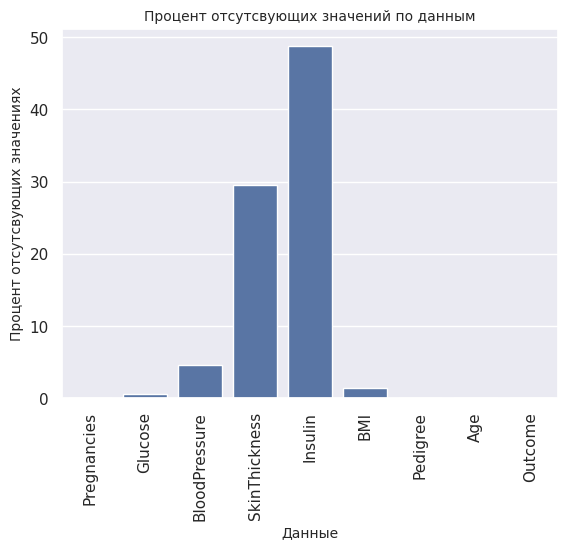

In [97]:
total = data.isnull().sum()
percent = (total / len(data)) * 100
missing_data = pd.DataFrame({'Процент пропущенных значений': percent})

fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(x=missing_data.index, y=missing_data['Процент пропущенных значений'], ax=ax)

ax.set_xlabel('Данные', fontsize=10)
ax.set_ylabel('Процент отсутсвующих значениях', fontsize=10)
ax.set_title('Процент отсутсвующих значений по данным', fontsize=10)
plt.show()

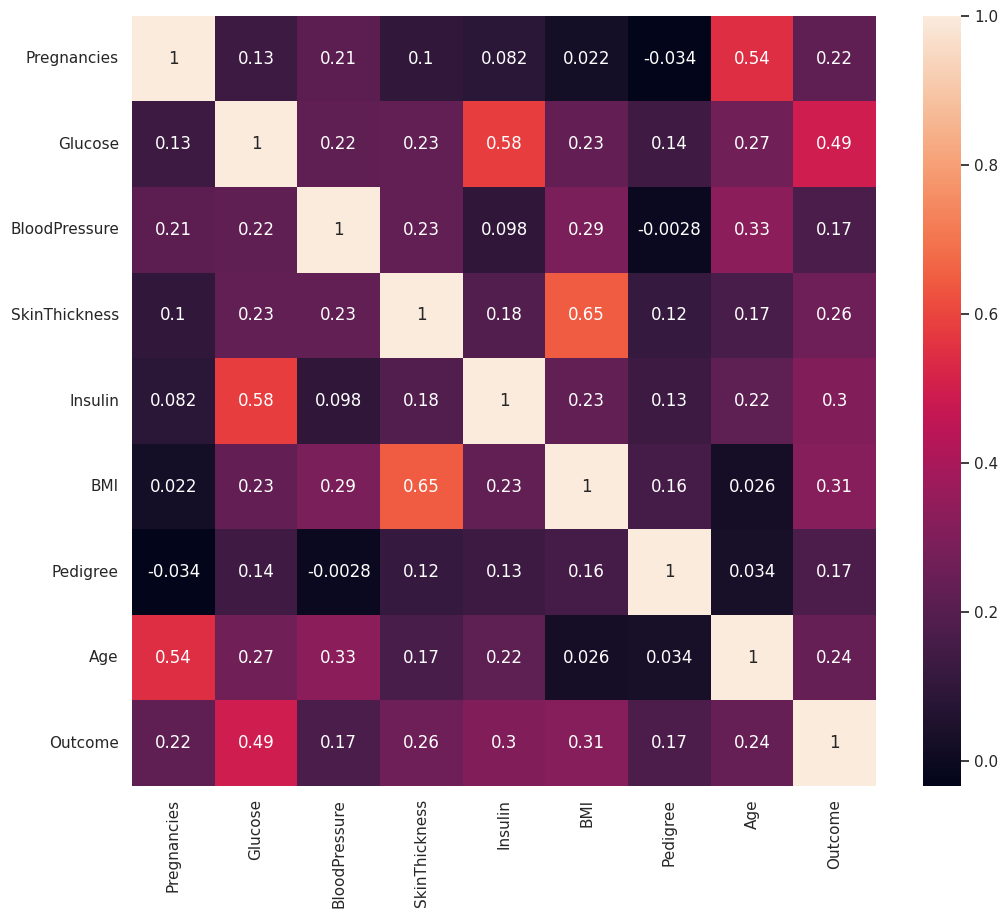

In [98]:
plt.figure(figsize=(12,10))  
sns.heatmap(data.corr(),annot=True)
plt.show()

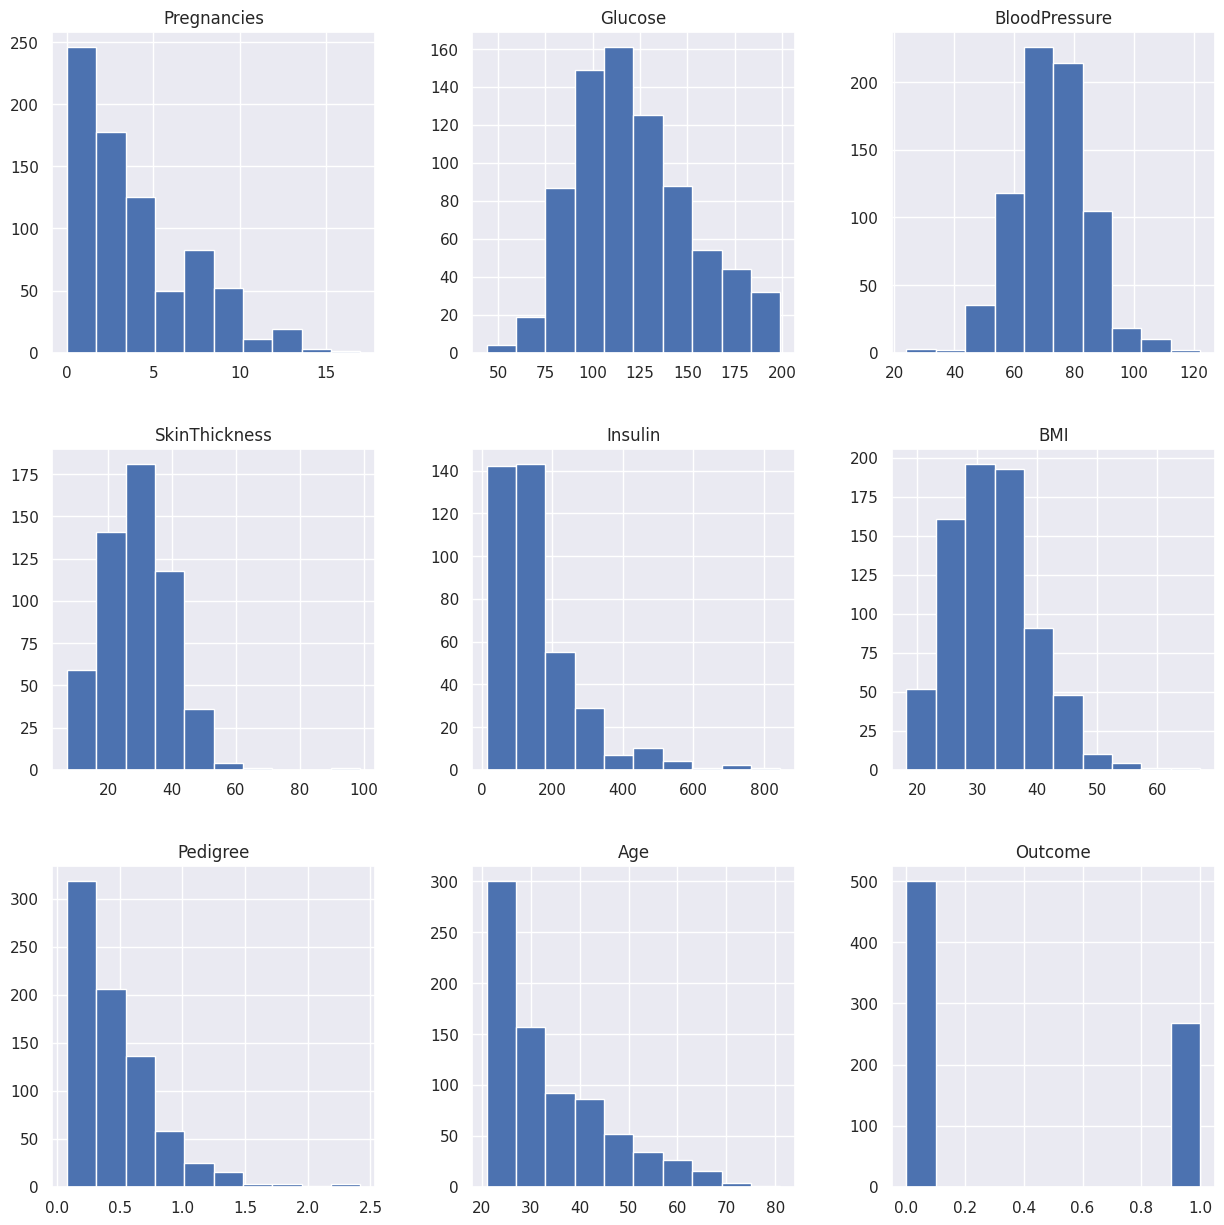

In [99]:
data.hist(figsize = (15,15))
plt.show()

Из графиков, можно увидеть, что столбцы глюкозы и артериального давления почти нормально распределены, тогда как SkinThickness, инсулин и ИМТ имеют положительную асимметрию.
Поэтому стоит заменить недостающие значения в соответствии с их распределением.

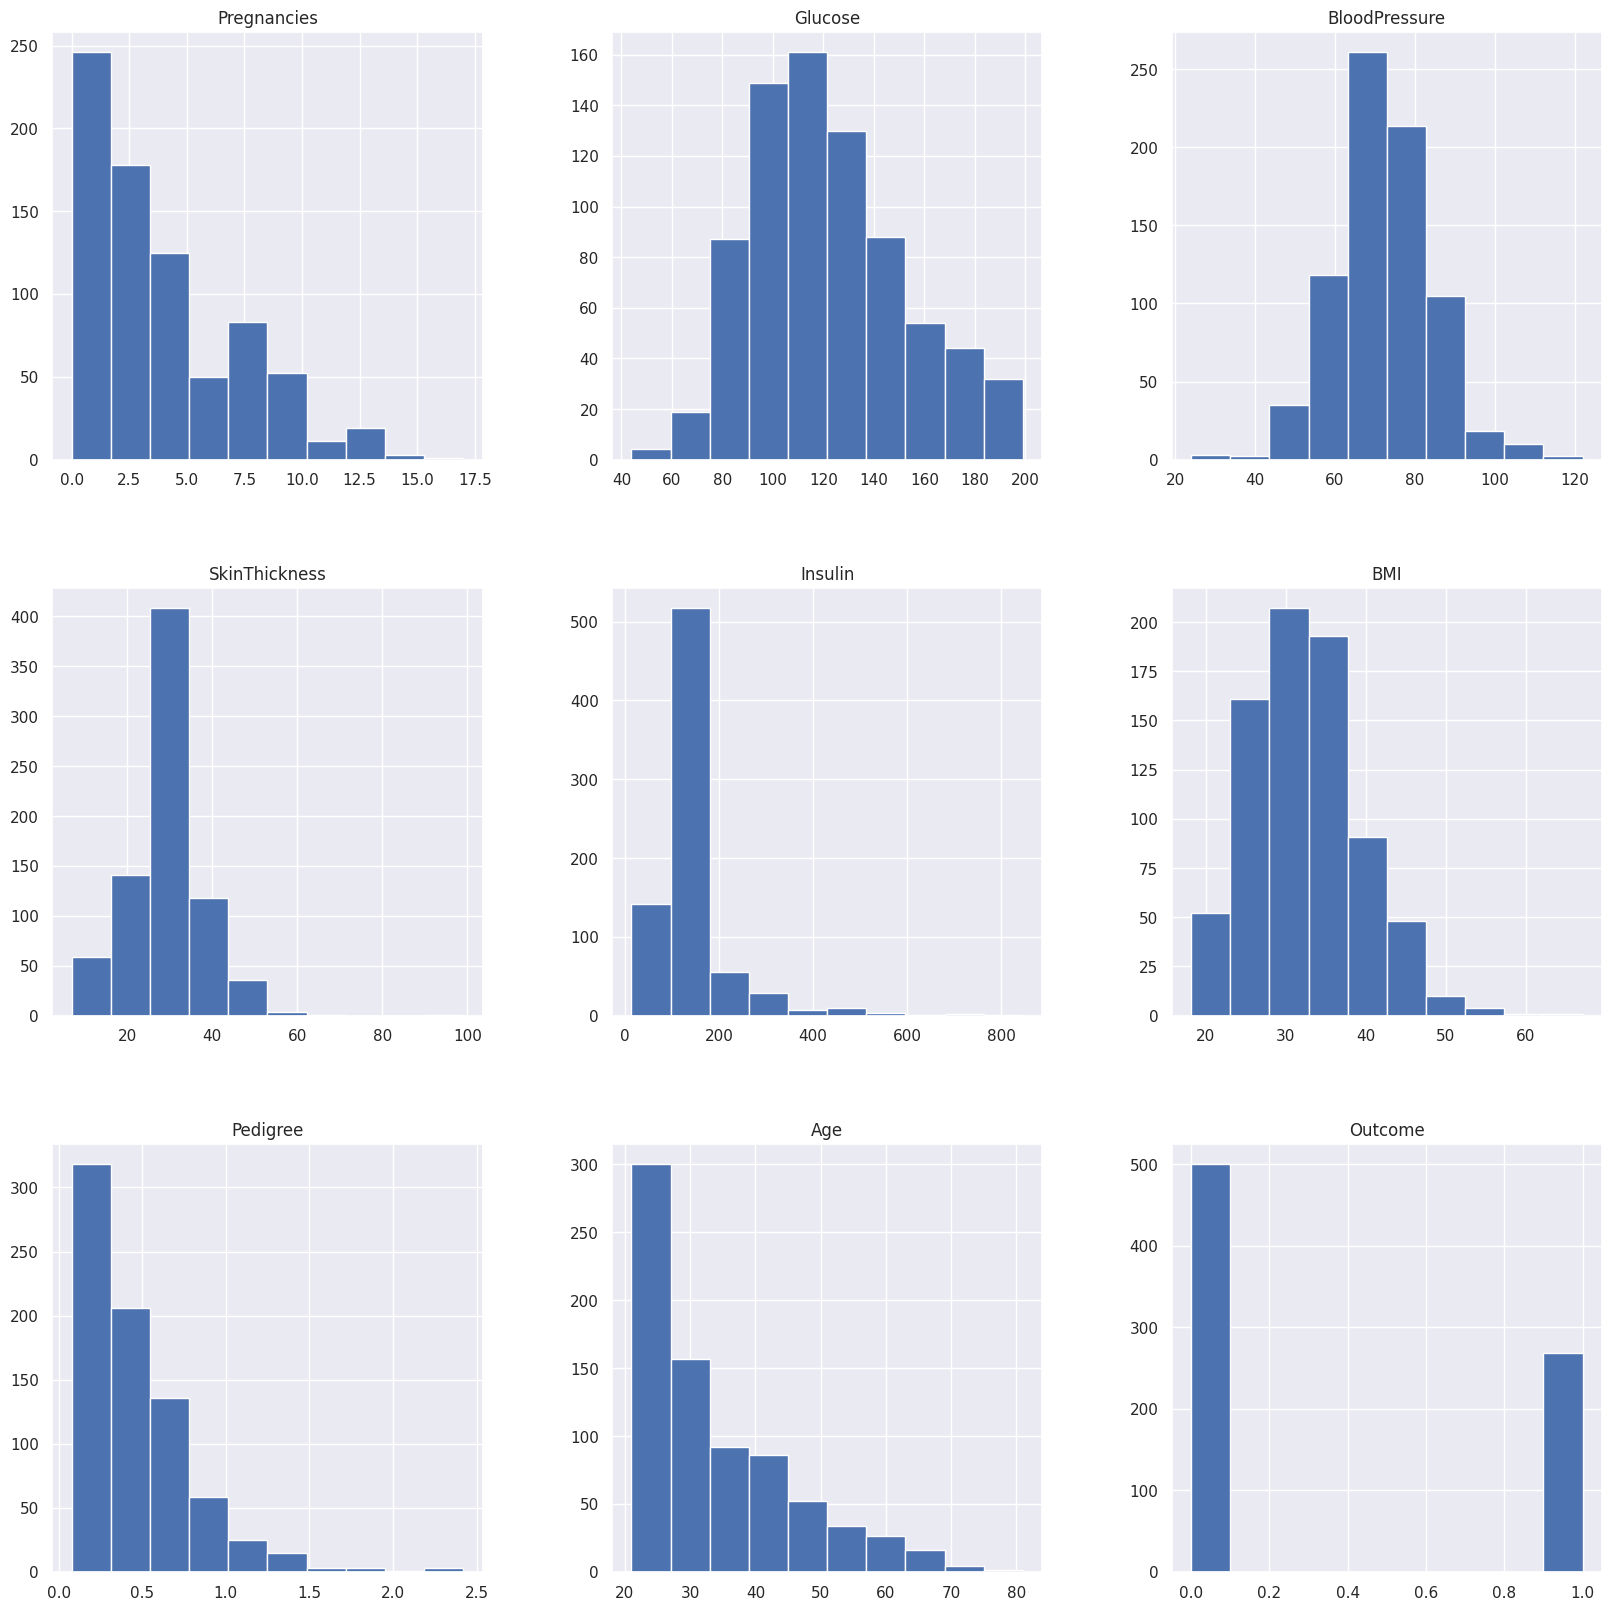

In [100]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

data.hist(figsize = (20,20))
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

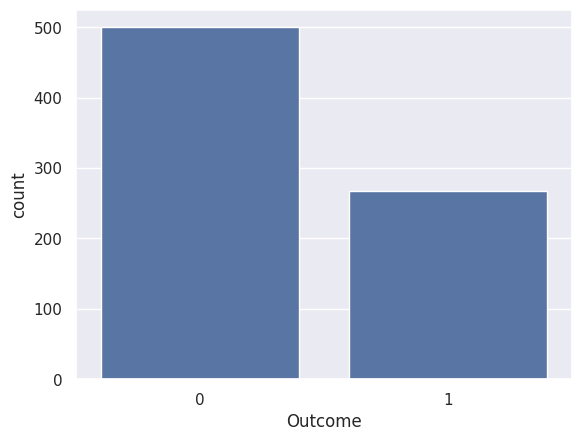

In [101]:
sns.countplot(x='Outcome', data=data)

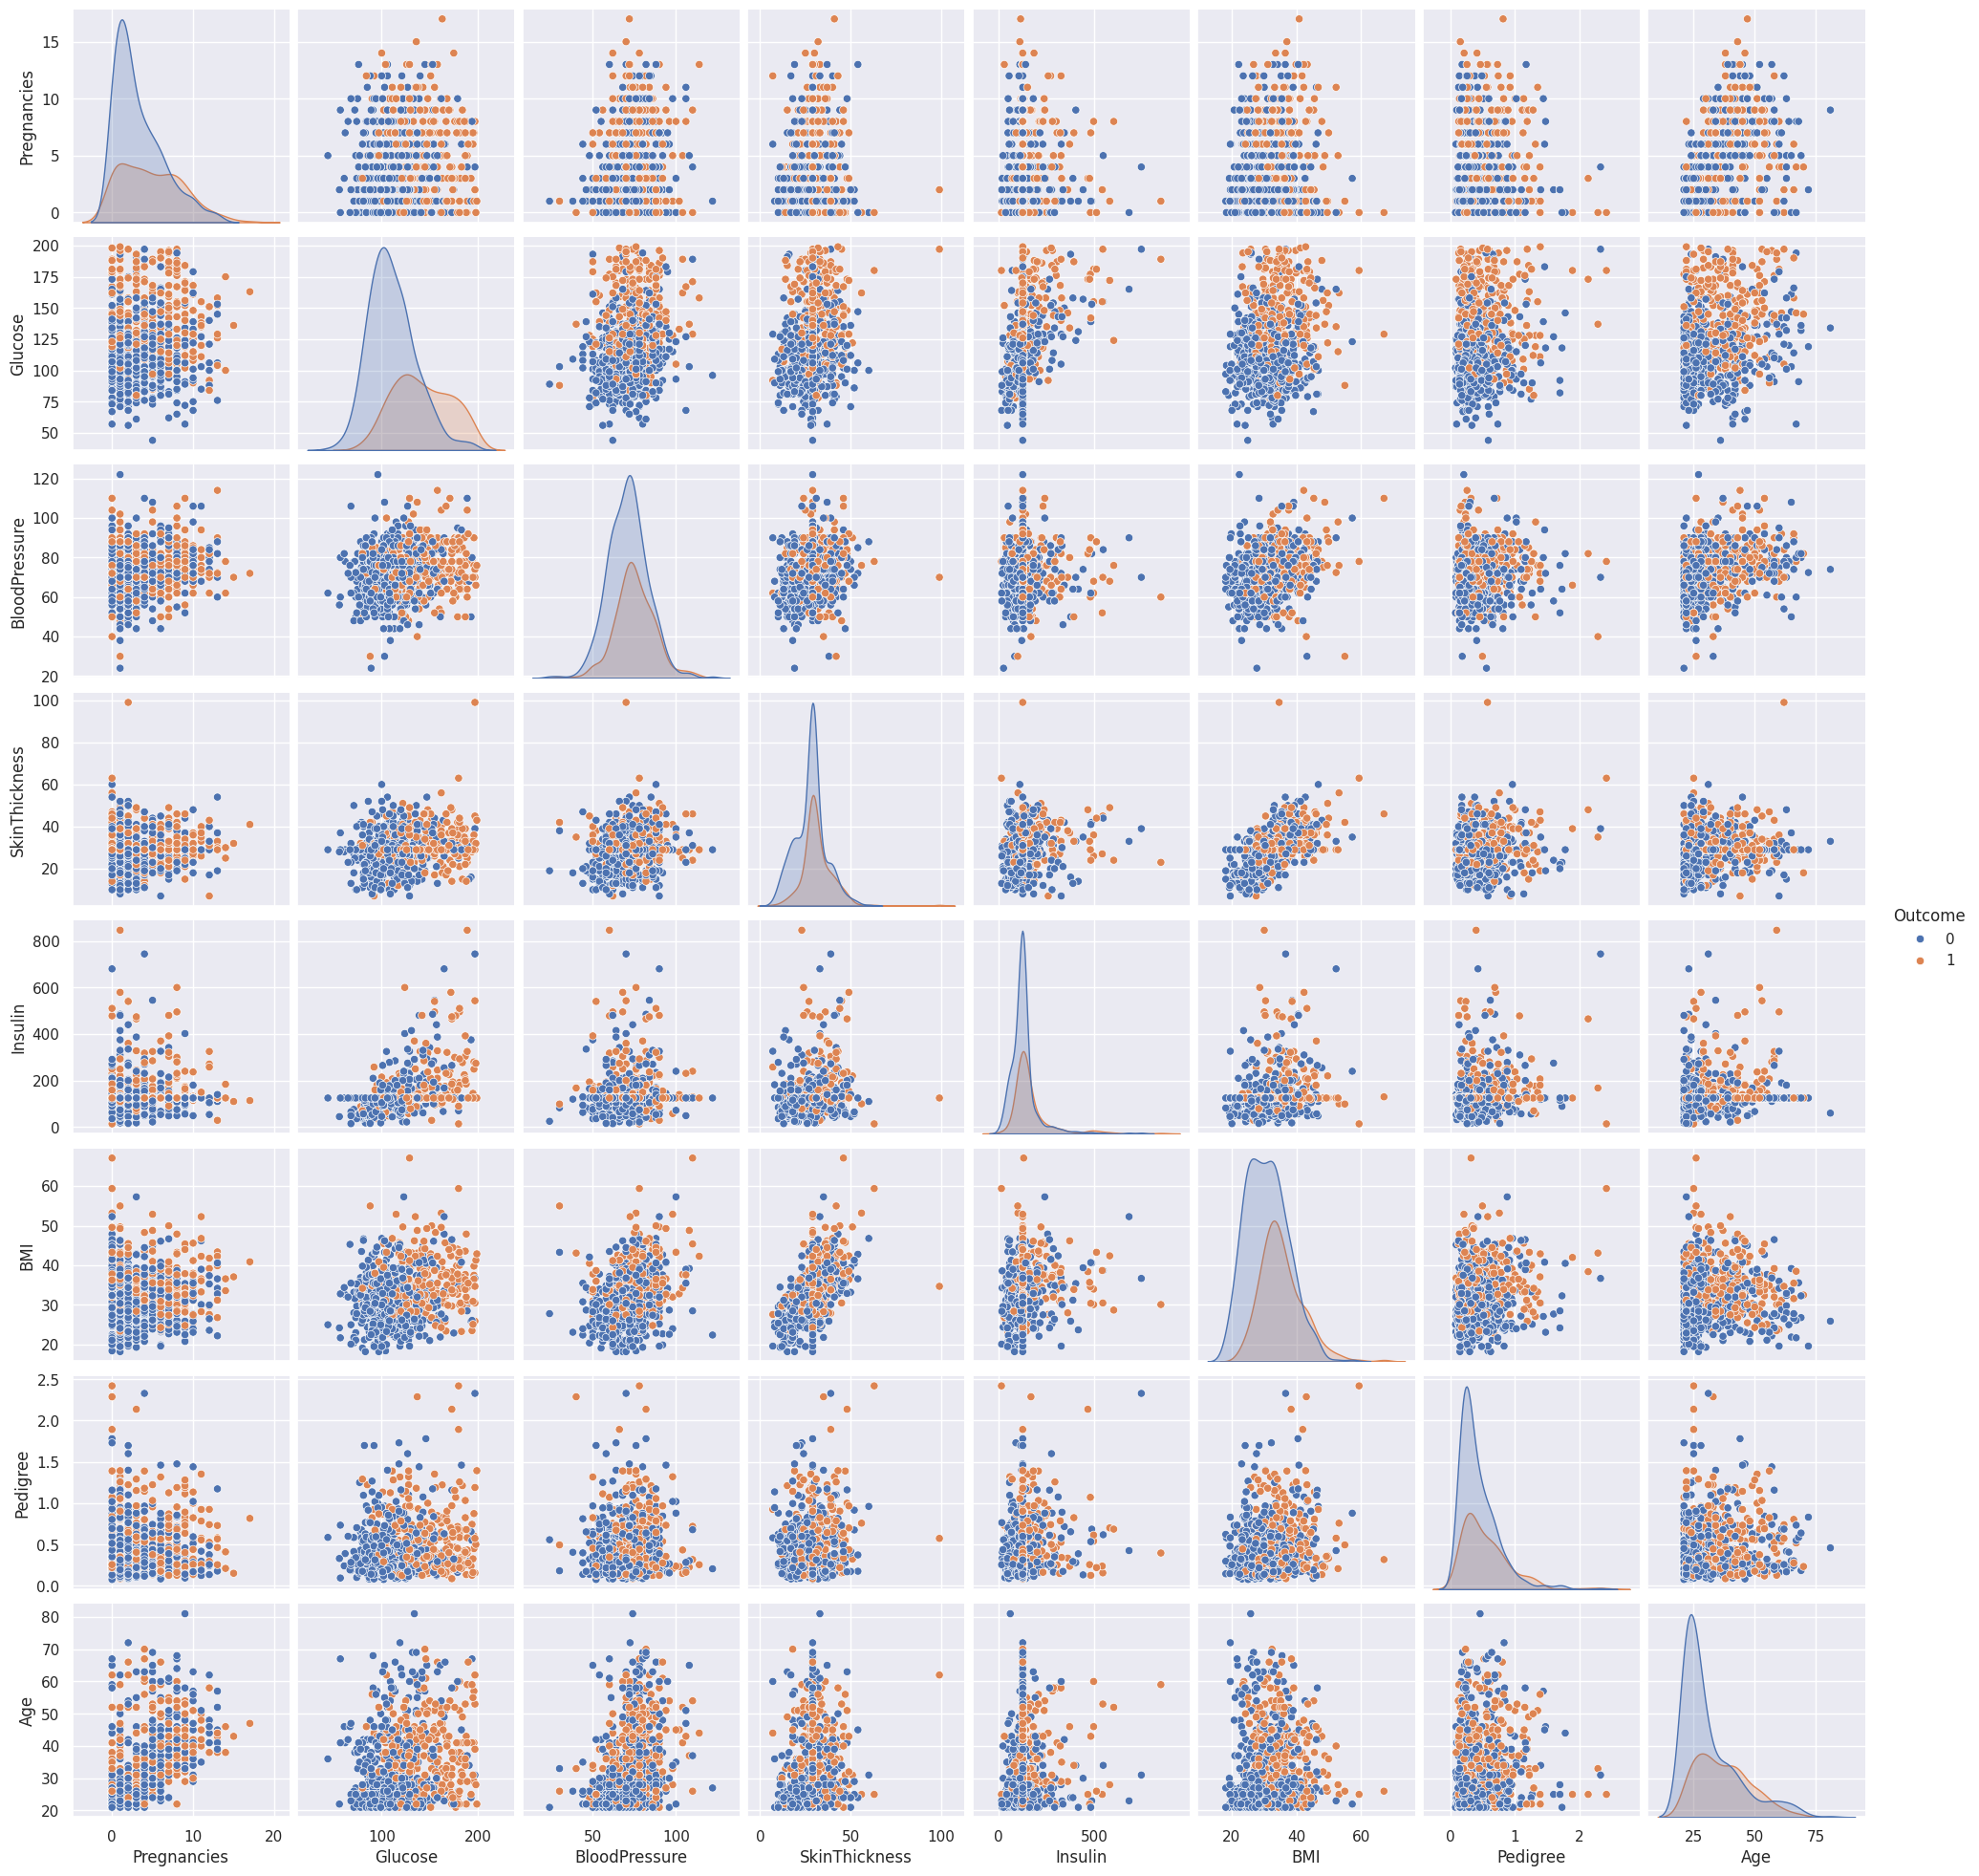

In [102]:
sns.pairplot(data,hue='Outcome')

# Задание

Нужно построить модель которая решит задачу классификации. Нужно использовать модели из списка:

    1. Логистическая регрессия
    2. Метод опорных векторов (SVM-classifier)
    3. Дерево решений
    4. Случайный лес
Также можно использовать подбор параметров и регуляризации (GridSearch) и работу с различными ядрами (SVM). 

Обязательно нужно сделать: 

    1. валидацию модели
    2. Построение confusion matrix
    3. classification report

### Теорминимум

#### Описание моделий и метода подбора параметров
***Логистическая регрессия:***

Логистическая регрессия используется для задач бинарной классификации, когда нужно предсказать вероятность принадлежности к одному из двух классов. Например, в вашем случае, нужно предсказать, страдает ли человек диабетом или нет. 

Логистическая регрессия основана на линейной регрессии, но вместо того, чтобы предсказывать конкретное числовое значение, она предсказывает вероятность принадлежности к классу 1. Для этого используется логистическая функция, которая преобразует выход модели в диапазоне [0, 1].

Модель обучается путем настройки весов признаков таким образом, чтобы минимизировать ошибку предсказания вероятности принадлежности к классу. Регуляризация (параметр C в вашем случае) помогает предотвратить переобучение модели.

Параметры для подбора (param_grid):

   - C: обратный коэффициент регуляризации. Чем меньше значение, тем сильнее регуляризация.
   - penalty: тип регуляризации. Может быть 'l1', 'l2', 'elasticnet' или 'none'.
    
***Дерево решений:***

Дерево решений - это модель машинного обучения, которая принимает решения на основе значений признаков. Она представляет собой древовидную структуру, в которой каждый узел представляет собой тест на значение определенного признака, каждая ветвь - результат этого теста, а каждый лист - прогноз модели.

Модель строится таким образом, чтобы минимизировать энтропию или критерий Джини (это меры неопределенности), разделяя данные на подгруппы (узлы) таким образом, чтобы в каждой подгруппе были объекты одного класса.

Параметры max_depth, min_samples_split и min_samples_leaf влияют на сложность дерева и насколько точно оно будет соответствовать данным. Например, max_depth ограничивает глубину дерева, чтобы избежать переобучения.

Параметры для подбора (param_grid):

   - max_depth: максимальная глубина дерева.
   - min_samples_split: минимальное количество образцов, необходимое для разделения внутреннего узла.
   - min_samples_leaf: минимальное количество образцов, необходимое для образования листа.
    
***Случайный лес:***

Случайный лес - это ансамблевый метод, который объединяет несколько деревьев решений для получения более точного и стабильного прогноза. Каждое дерево в случайном лесу обучается на случайной подвыборке данных и с использованием случайного подмножества признаков. Это помогает уменьшить переобучение и повысить обобщающую способность модели.

Параметры n_estimators, max_depth, min_samples_split и min_samples_leaf влияют на количество деревьев в лесу и их характеристики, аналогично деревьям решений.

Параметры для подбора (param_grid):

   - n_estimators: количество деревьев в лесу.
   - max_depth: максимальная глубина каждого дерева.
   - min_samples_split: минимальное количество образцов, необходимое для разделения внутреннего узла.
   - min_samples_leaf: минимальное количество образцов, необходимое для образования листа.

***Метод опорных векторов (SVM):***

Метод опорных векторов - это модель, которая строит гиперплоскость в пространстве признаков, разделяющую объекты разных классов. Гиперплоскость выбирается таким образом, чтобы максимизировать расстояние от нее до ближайших объектов обучающей выборки (опорных векторов).

Параметр C влияет на ширину "разделяющей полосы" гиперплоскости и помогает балансировать между максимизацией ширины разделяющей полосы и минимизацией ошибки классификации. Параметр gamma влияет на форму гиперплоскости и может использоваться для управления гладкостью границы между классами. Параметр kernel определяет тип используемого ядра для преобразования признаков в пространство более высокой размерности.

Параметры для подбора (param_grid):

   - C: параметр регуляризации.
   - gamma: коэффициент ядра для 'rbf', 'poly' и 'sigmoid'.
   - kernel: ядро для преобразования пространства объектов в SVM.

***GridSearchCV:***

*GridSearchCV* - это метод, используемый для систематического поиска лучших параметров модели путем перебора всех комбинаций параметров из заданного сетки (param_grid) и выбора той комбинации, которая обеспечивает наилучшую производительность на кросс-валидации. Он автоматически разбивает обучающие данные на несколько подмножеств (фолдов), обучает модель на каждом фолде и оценивает производительность каждой комбинации параметров с использованием выбранной метрики (например, точность или F1-мера). В конце GridSearchCV выбирает параметры, которые дали наилучший результат на кросс-валидации и возвращает обученную модель с этими параметрами.

#### Оценка модели
   1. ***Precision*** (точность): доля правильно предсказанных положительных классов от общего числа предсказанных положительных классов. (насколько часто модель правильно предсказывает положительные случаи)

Precision = *TP/(TP+FP)*
    
Где TP - количество истинно положительных предсказаний, FP - количество ложно положительных предсказаний.

   2. ***Recall*** (полнота): доля правильно предсказанных положительных классов от общего числа истинных положительных классов. (насколько часто модель обнаруживает положительные случаи)

Recall = *TP/(TP+FN)*

Где FN - количество ложно отрицательных предсказаний.

   3. ***F1-score*** (F1-мера): среднее гармоническое между точностью и полнотой. F1-мера достигает своего наилучшего значения в 1 и худшего в 0. (среднее гармоническое между точностью и полнотой. Используется для сравнения различных моделей.)

F1-score = *2 × ((Precision × Recall)/(Precision + Recall))*

   4. ***Accuracy*** (точность): доля правильных предсказаний по всем классам. (идеальное значение 1, что означает, что модель абсолютно точна. Однако в случае несбалансированных классов этот показатель может быть введен в заблуждение.)

Accuracy = *(TP+TN)/(TP+TN+FP+FN)*

Где TN - количество истинно отрицательных предсказаний.

   5. ***Macro avg*** (среднее по всем классам): среднее значение precision, recall и F1-score для всех классов без учета их дисбаланса. Каждый класс весится одинаково.
   
   6. ***Weighted avg*** (взвешенное среднее по всем классам): среднее значение precision, recall и F1-score для всех классов, взвешенное их поддержкой (support). Это может быть полезно при несбалансированных классах, когда некоторые классы имеют больше представителей, чем другие.
   
   - Macro avg и weighted avg: оба метрики позволяют оценить модель в целом, усредняя показатели по всем классам. Macro avg дает равный вес каждому классу, в то время как weighted avg учитывает дисбаланс классов.

В целом, хорошая модель должна иметь высокие значения precision, recall и F1-score для обоих классов.

In [103]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Логистическая регрессия

In [104]:
%%capture
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid, refit=True, verbose=3)
log_reg_grid.fit(X_train, y_train)

In [105]:
print("Лучшие параметры для логистической регрессии:", log_reg_grid.best_params_)

y_pred_log_reg = log_reg_grid.predict(X_test)

print("Логистическая регрессия с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Лучшие параметры для логистической регрессии: {'C': 1, 'penalty': 'l2'}
Логистическая регрессия с подобранными параметрами:
Confusion Matrix:
[[124  27]
 [ 33  47]]


### Дерево решений

In [106]:
%%capture

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, param_grid, refit=True, verbose=3)
dt_grid.fit(X_train, y_train)


Лучшие параметры для дерева решений: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Дерево решений с подобранными параметрами:
Confusion Matrix:
[[127  24]
 [ 30  50]]


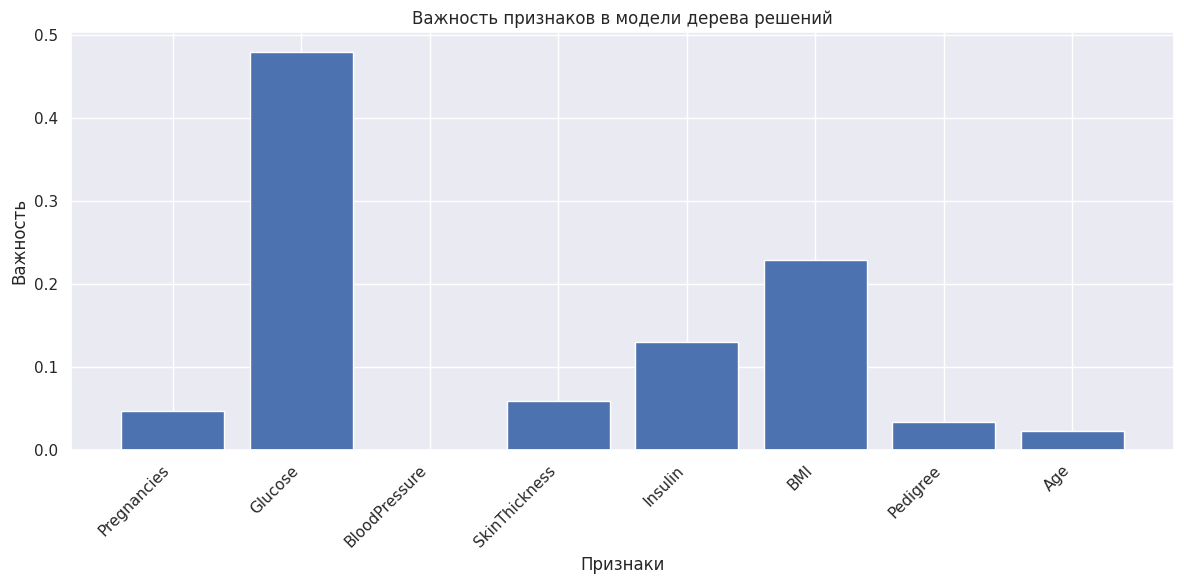

In [107]:

print("Лучшие параметры для дерева решений:", dt_grid.best_params_)

y_pred_dt = dt_grid.predict(X_test)

print("Дерево решений с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

feature_importances = dt_grid.best_estimator_.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в модели дерева решений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Наивный Байес

In [108]:
%%capture
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gnb_grid_search = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)
gnb_grid_search.fit(X_train, y_train)


In [109]:
# Вывод лучших параметров
print(f'Лучшие параметры для Наивного байесовского алгаритма: {gnb_grid_search.best_params_}')

y_pred_gnb_grid_search = gnb_grid_search.predict(X_test)

print("Наивного байесовского алгаритма с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb_grid_search))

Лучшие параметры для Наивного байесовского алгаритма: {'var_smoothing': 1e-06}
Наивного байесовского алгаритма с подобранными параметрами:
Confusion Matrix:
[[119  32]
 [ 29  51]]


### SVM

In [110]:
%%capture
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

svm = SVC()
svm_grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)
svm_grid.fit(X_train, y_train)

In [111]:
print("Лучшие параметры для SVM:", svm_grid.best_params_)

y_pred_svm = svm_grid.predict(X_test)

print("Метод опорных векторов (SVM) с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Лучшие параметры для SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Метод опорных векторов (SVM) с подобранными параметрами:
Confusion Matrix:
[[125  26]
 [ 33  47]]


In [112]:
print("Логистическая регрессия с подобранными параметрами:")
print(classification_report(y_test, y_pred_log_reg))

print("Дерево решений с подобранными параметрами:")
print(classification_report(y_test, y_pred_dt))

print("Наивный байесовский алгаритм с подобранными параметрами:")
print(classification_report(y_test, y_pred_gnb_grid_search))

print("Метод опорных векторов (SVM) с подобранными параметрами:")
print(classification_report(y_test, y_pred_svm))

Логистическая регрессия с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Дерево решений с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       151
           1       0.68      0.62      0.65        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231

Наивный байесовский алгаритм с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.61      0.64      0.63        80

    accuracy                  

# Downsampling

In [113]:
df_majority = data[data.Outcome == 0]
df_minority = data[data.Outcome == 1]

df_majority_downsampled = resample(
    df_majority,
    replace=False,  # Без замены
    n_samples=len(df_minority),  # Количество образцов в меньшем классе
    random_state=42)  # Для воспроизводимости

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print(df_downsampled.Outcome.value_counts())

Outcome
0    268
1    268
Name: count, dtype: int64


In [114]:
X = df_downsampled.drop('Outcome', axis=1)
y = df_downsampled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
%%capture
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

log_reg = LogisticRegression()

log_reg_grid = GridSearchCV(log_reg, param_grid, refit=True, verbose=3)
log_reg_grid.fit(X_train, y_train)

In [116]:
print("Лучшие параметры для логистической регрессии:",
      log_reg_grid.best_params_)

y_pred_log_reg = log_reg_grid.predict(X_test)

print("Логистическая регрессия с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Лучшие параметры для логистической регрессии: {'C': 10, 'penalty': 'l2'}
Логистическая регрессия с подобранными параметрами:
Confusion Matrix:
[[65 11]
 [29 56]]


In [117]:
%%capture
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, param_grid, refit=True, verbose=3)
dt_grid.fit(X_train, y_train)

In [118]:
print("Лучшие параметры для дерева решений:", dt_grid.best_params_)

y_pred_dt = dt_grid.predict(X_test)

print("Дерево решений с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Лучшие параметры для дерева решений: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Дерево решений с подобранными параметрами:
Confusion Matrix:
[[62 14]
 [27 58]]


In [119]:
%%capture
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gnb_grid_search = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)
gnb_grid_search.fit(X_train, y_train)

In [120]:
# Вывод лучших параметров
print(f'Лучшие параметры для Наивного байесовского алгаритма: {gnb_grid_search.best_params_}')

y_pred_gnb_grid_search = gnb_grid_search.predict(X_test)

print("Наивного байесовского алгаритма с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb_grid_search))

Лучшие параметры для Наивного байесовского алгаритма: {'var_smoothing': 1e-05}
Наивного байесовского алгаритма с подобранными параметрами:
Confusion Matrix:
[[64 12]
 [34 51]]


In [121]:
%%capture
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'sigmoid']}

svm = SVC()

svm_grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)
svm_grid.fit(X_train, y_train)


In [122]:

print("Лучшие параметры для SVM:", svm_grid.best_params_)

y_pred_svm = svm_grid.predict(X_test)

print("Метод опорных векторов (SVM) с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Лучшие параметры для SVM: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Метод опорных векторов (SVM) с подобранными параметрами:
Confusion Matrix:
[[61 15]
 [25 60]]


In [123]:
print("Логистическая регрессия с подобранными параметрами:")
print(classification_report(y_test, y_pred_log_reg))

print("Дерево решений с подобранными параметрами:")
print(classification_report(y_test, y_pred_dt))

print("Наивный байесовский алгаритм с подобранными параметрами:")
print(classification_report(y_test, y_pred_gnb_grid_search))

print("Метод опорных векторов (SVM) с подобранными параметрами:")
print(classification_report(y_test, y_pred_svm))

Логистическая регрессия с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.69      0.86      0.76        76
           1       0.84      0.66      0.74        85

    accuracy                           0.75       161
   macro avg       0.76      0.76      0.75       161
weighted avg       0.77      0.75      0.75       161

Дерево решений с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        76
           1       0.81      0.68      0.74        85

    accuracy                           0.75       161
   macro avg       0.75      0.75      0.75       161
weighted avg       0.75      0.75      0.74       161

Наивный байесовский алгаритм с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.65      0.84      0.74        76
           1       0.81      0.60      0.69        85

    accuracy                  

# Upsampling

In [124]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # С заменой
                                 n_samples=len(df_majority),  # Количество образцов в большем классе
                                 random_state=42)   # Для воспроизводимости

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.Outcome.value_counts())

Outcome
0    500
1    500
Name: count, dtype: int64


In [125]:
X = df_upsampled.drop('Outcome', axis=1)
y = df_upsampled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
%%capture
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet', 'none']}

log_reg = LogisticRegression()

log_reg_grid = GridSearchCV(log_reg, param_grid, refit=True, verbose=3)
log_reg_grid.fit(X_train, y_train)

In [127]:

print("Лучшие параметры для логистической регрессии:", log_reg_grid.best_params_)

y_pred_log_reg = log_reg_grid.predict(X_test)

print("Логистическая регрессия с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Лучшие параметры для логистической регрессии: {'C': 0.1, 'penalty': 'l2'}
Логистическая регрессия с подобранными параметрами:
Confusion Matrix:
[[111  39]
 [ 38 112]]


In [128]:
%%capture
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, param_grid, refit=True, verbose=3)
dt_grid.fit(X_train, y_train)

In [129]:

print("Лучшие параметры для дерева решений:", dt_grid.best_params_)

y_pred_dt = dt_grid.predict(X_test)

print("Дерево решений с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Лучшие параметры для дерева решений: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Дерево решений с подобранными параметрами:
Confusion Matrix:
[[120  30]
 [ 29 121]]


In [130]:
%%capture
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gnb_grid_search = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)
gnb_grid_search.fit(X_train, y_train)

In [131]:
print(f'Лучшие параметры для Наивного байесовского алгаритма: {gnb_grid_search.best_params_}')

y_pred_gnb_grid_search = gnb_grid_search.predict(X_test)

print("Наивного байесовского алгаритма с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb_grid_search))

Лучшие параметры для Наивного байесовского алгаритма: {'var_smoothing': 1e-06}
Наивного байесовского алгаритма с подобранными параметрами:
Confusion Matrix:
[[117  33]
 [ 45 105]]


In [132]:
%%capture
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'sigmoid']}

svm = SVC()

svm_grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)
svm_grid.fit(X_train, y_train)

In [133]:

print("Лучшие параметры для SVM:", svm_grid.best_params_)

y_pred_svm = svm_grid.predict(X_test)

print("Метод опорных векторов (SVM) с подобранными параметрами:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Лучшие параметры для SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Метод опорных векторов (SVM) с подобранными параметрами:
Confusion Matrix:
[[150   0]
 [ 55  95]]


In [134]:
print("Логистическая регрессия с подобранными параметрами:")
print(classification_report(y_test, y_pred_log_reg))

print("Дерево решений с подобранными параметрами:")
print(classification_report(y_test, y_pred_dt))

print("Наивный байесовский алгаритм с подобранными параметрами:")
print(classification_report(y_test, y_pred_gnb_grid_search))

print("Метод опорных векторов (SVM) с подобранными параметрами:")
print(classification_report(y_test, y_pred_svm))

Логистическая регрессия с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       150
           1       0.74      0.75      0.74       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300

Дерево решений с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       150
           1       0.80      0.81      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

Наивный байесовский алгаритм с подобранными параметрами:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       150
           1       0.76      0.70      0.73       150

    accuracy                  